In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\maz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv('C:/Users/maz/Desktop/master/Sales Leads Classification/Leads.csv')
salesdata= data.dropna()
print(data.shape)
print(list(data.columns))
cols_to_transform = ['Supplier', 'Customer', 'Region', 'Product_category', 'industry_vertical', 'Flag', 'Seniority_level', 'Type']
df_with_dummies = pd.get_dummies(salesdata, columns = cols_to_transform )
Sale =df_with_dummies['Sale']
df_with_dummies.drop(['Sale'],1, inplace=True)

(68, 9)
['Sale', 'Supplier', 'Customer', 'Region', 'Product_category', 'industry_vertical', 'Flag', 'Seniority_level', 'Type']


In [4]:
df_with_dummies

,Supplier_A,Supplier_B,Supplier_C,Supplier_D,Supplier_E,Supplier_F,Customer_H,Customer_J,Customer_K,Customer_L,...,Seniority_level_Grade 2,Seniority_level_Grade 3,Seniority_level_Grade 4,Seniority_level_Grade 5,Seniority_level_Grade 6,Seniority_level_Grade 7,Seniority_level_Grade 8,Seniority_level_Grade 9,Type_Greenfield,Type_maintanance
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


C:\Users\maz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


Index(['Sale', 'Supplier', 'Customer', 'Region', 'Product_category',
       'industry_vertical', 'Flag', 'Seniority_level', 'Type', 'Supplier_A',
       'Supplier_B', 'Supplier_C', 'Supplier_D', 'Supplier_E', 'Supplier_F',
       'Customer_H', 'Customer_J', 'Customer_K', 'Customer_L', 'Customer_z',
       'Region_Ahmadi', 'Region_Farwaniya', 'Region_Shuwaikh',
       'Product_category_Electrical', 'Product_category_Mechanical',
       'Product_category_chemical', 'Product_category_instrumentaion',
       'industry_vertical_KNPC', 'industry_vertical_KOC',
       'industry_vertical_MEW', 'Flag_New', 'Flag_OLD',
       'Seniority_level_Grade 1', 'Seniority_level_Grade 2',
       'Seniority_level_Grade 3', 'Seniority_level_Grade 4',
       'Seniority_level_Grade 5', 'Seniority_level_Grade 6',
       'Seniority_level_Grade 7', 'Seniority_level_Grade 8',
       'Seniority_level_Grade 9', 'Type_Greenfield', 'Type_maintanance'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_with_dummies, Sale, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l1', C=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [17]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = LogisticRegression(penalty='l1', C=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.593


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 4]
 [2 2]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.69      0.75        13
          1       0.33      0.50      0.40         4

avg / total       0.70      0.65      0.67        17



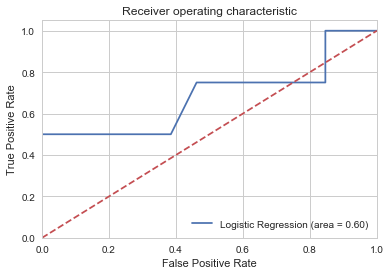

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
logreg.coef_[0,]
coef=np.vstack((np.array(df_with_dummies.columns),logreg.coef_[0,]))
coef1=coef[:,coef[1] !=0]
coef1

array([['Supplier_A', 'Customer_L', 'industry_vertical_KNPC',
        'industry_vertical_MEW', 'Seniority_level_Grade 1',
        'Seniority_level_Grade 2', 'Seniority_level_Grade 3',
        'Type_maintanance'],
       [0.24782889803025904, 0.425345169745112, -0.07621501927737406,
        0.9760698410197236, 0.1110828368706275, -1.3184215916328148,
        -0.7323344364319867, 0.30186512818524985]], dtype=object)

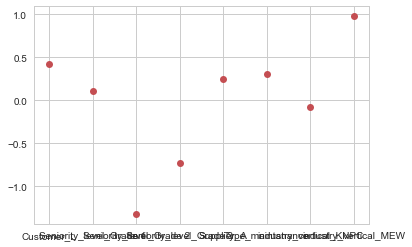

In [36]:
import matplotlib.pyplot as plot
%matplotlib inline 
plot.plot(coef1[0],coef1[1], 'ro')


In [106]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [111]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [39]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier. By convention, clf means 'Classifier'
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [54]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(X_test)[:,1]

array([ 0.77      ,  0.9       ,  0.1       ,  0.2       ,  0.        ,
        0.85      ,  0.3       ,  0.05      ,  0.        ,  0.23333333,
        0.23333333,  0.65      ,  0.25      ,  0.46666667,  0.94      ,
        1.        ,  0.6       ])

In [43]:
# View a list of the features and their importance scores
list(zip(X_train.columns, clf.feature_importances_))

[('Supplier_A', 0.035350289544831097),
 ('Supplier_B', 0.033384532408705439),
 ('Supplier_C', 0.012733180416407206),
 ('Supplier_D', 0.018288609922550859),
 ('Supplier_E', 0.047084403220270347),
 ('Supplier_F', 0.0),
 ('Customer_H', 0.07036738516100341),
 ('Customer_J', 0.03732910700486488),
 ('Customer_K', 0.028135743353440774),
 ('Customer_L', 0.017252637996301817),
 ('Customer_z', 0.034680372850385499),
 ('Region_Ahmadi', 0.020728180903509235),
 ('Region_Farwaniya', 0.06990840593275785),
 ('Region_Shuwaikh', 0.033731541443769088),
 ('Product_category_Electrical', 0.0092662784089152274),
 ('Product_category_Mechanical', 0.046737914413363425),
 ('Product_category_chemical', 0.0082133870156014081),
 ('Product_category_instrumentaion', 0.012082085545641521),
 ('industry_vertical_KNPC', 0.071418455393757907),
 ('industry_vertical_KOC', 0.014880719965940087),
 ('industry_vertical_MEW', 0.048018953586234703),
 ('Flag_New', 0.026618913708788917),
 ('Flag_OLD', 0.022826992212343373),
 ('Seni

In [48]:
# Create confusion matrix
y_pred=clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,8,5
1,2,2


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.62      0.70        13
          1       0.29      0.50      0.36         4

avg / total       0.68      0.59      0.62        17



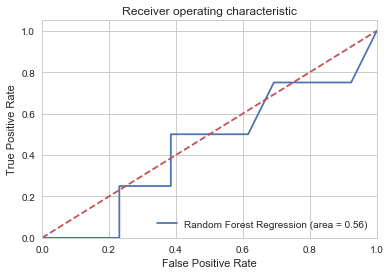

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.1,max_depth=3, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
clf.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [60]:
# View a list of the features and their importance scores
list(zip(X_train.columns, clf.feature_importances_))

[('Supplier_A', 0.044914924227256188),
 ('Supplier_B', 0.070483014071601541),
 ('Supplier_C', 0.04144346159156459),
 ('Supplier_D', 0.034263271188586165),
 ('Supplier_E', 0.030881346638424883),
 ('Supplier_F', 0.0031076541625463402),
 ('Customer_H', 0.021673985769312877),
 ('Customer_J', 0.0075560750743678433),
 ('Customer_K', 0.012979673549448463),
 ('Customer_L', 0.060556246633248961),
 ('Customer_z', 0.01293211435892715),
 ('Region_Ahmadi', 0.0049193524126701204),
 ('Region_Farwaniya', 0.014841660169020585),
 ('Region_Shuwaikh', 0.012948167815274622),
 ('Product_category_Electrical', 0.034574831360177964),
 ('Product_category_Mechanical', 0.031480414427522252),
 ('Product_category_chemical', 0.053950385150337808),
 ('Product_category_instrumentaion', 0.011357988495421346),
 ('industry_vertical_KNPC', 0.073530564631451772),
 ('industry_vertical_KOC', 0.019421575751646228),
 ('industry_vertical_MEW', 0.04891052752246608),
 ('Flag_New', 0.046430329900519388),
 ('Flag_OLD', 0.0250999854

In [126]:
# Create confusion matrix
y_pred=clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = GradientBoostingClassifier(learning_rate=0.1,max_depth=3, random_state=0)
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.581


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.88      0.54      0.67        13
          1       0.33      0.75      0.46         4

avg / total       0.75      0.59      0.62        17



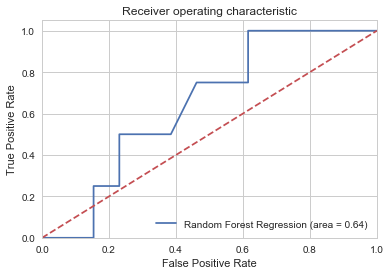

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosted Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBT_ROC')
plt.show()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [86]:
clf = svm.SVC(kernel='linear', C = 1.0,probability=True)

In [87]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
y_pred=clf.predict(X_test)

In [125]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = svm.SVC(kernel='linear', C = 1.0,probability=True)
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.671


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.62      0.70        13
          1       0.29      0.50      0.36         4

avg / total       0.68      0.59      0.62        17



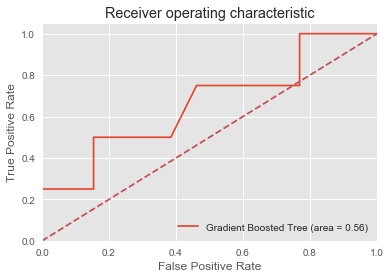

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosted Tree (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBT_ROC')
plt.show()


In [115]:
# Create a SVC classifier using an RBF kernel
clf = svm.SVC(kernel='rbf', random_state=0, gamma=1, C=3,probability=True)
# Train the classifier
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7,6
1,1,3


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.54      0.67        13
          1       0.33      0.75      0.46         4

avg / total       0.75      0.59      0.62        17



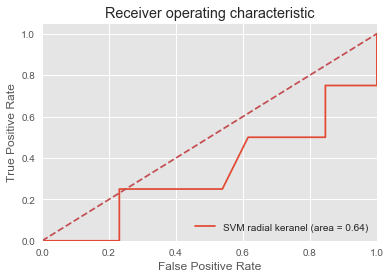

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
SVM_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM radial keranel (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_radial_ROC')
plt.show()

In [124]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = svm.SVC(kernel='rbf', random_state=0, gamma=1, C=2,probability=True)
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.514
